<b> This notebook will perform exploratory data analysis, statistical analysis, and finally select most optimal features for model training.

# 1. Problem Statement

In this project, we will utilize a [graduate school admission dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data]) from kaggle to develop a graduate school admission estimation system using machine learning. This system will especially aid international students in understanding how much of a realistic chance they have in getting admitted to the university of their choice in the US. 

# 2. Dataset Description

The `Graduate Admission 2` dataset from kaggle is utilized in this project. The dataset consists of several parameters, both numerical and categorical, like `GRE Scores`, `TOEFL Scores`, `University Ranking`, `SOP strength`, `LOR strength`, `Undergraduate GPA`, and `Research Experience`.

Using these set of features, we will train a linear regression model, and a polynomial regression, to predict the chances of admission (`Chance of Admit`). We will utilize Scikit-Learn library to train our ML model.

# 3. Importing Dependencies

In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 4. Let's Understand the Data 

In [2]:
# reading the csv file using pandas
df = pd.read_csv("dataset.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
# reading the first five rows of the pandas dataframe
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# getting row and column
df.shape

(400, 9)

We can see that there are 400 rows in the dataframe with 9 columns. Let's see the number of null values in the dataset with respect to each column.

In [6]:
# checking the nulls
df.isnull().sum() / df.shape[0] * 100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

This is great! There are no null values in the dataset. If there were null values, we would have to either remove them, or impute them with some proper value. Let's also go through the dataset's information.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


We can see that the dataset is currenly occupying ~24KB of system memory. Also, we can see the datatypes of each feature. Let's get all of the columns from our pandas dataframe.

In [8]:
# getting columns
columns_from_dataframe = df.columns;columns_from_dataframe

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Now that we have peeked on our data, let's get categorical and numerical features in our dataframe. Based on our dataframe's info we got earlier, we have few different datatypes in our columns: int64 and  float64. Let's identify the int64 columns to identify the categorical features and float64 to identify numerical columns.

In [9]:
# selecting categorical data types
int64_datatypes = df.select_dtypes(np.int64);int64_datatypes

,Serial No.,GRE Score,TOEFL Score,University Rating,Research
0,1,337,118,4,1
1,2,324,107,4,1
2,3,316,104,3,1
3,4,322,110,3,1
4,5,314,103,2,0
...,...,...,...,...,...
395,396,324,110,3,1
396,397,325,107,3,1
397,398,330,116,4,1
398,399,312,103,3,0


Well, the column `Serial No.` is kind of useless. It is just a unique identifier which is not relevant to us at all. So,w e can simply drop the column. `GRE Score` on the other hand could be important. But, it has lots of unique values. So, Even though it is not exactly a float data, we will use it in scatterplots and correlation calculation. The same applies to `TOEFL Score`. The interesting and pure categorical columns would be `Univerisity Rating` and `Research`. Also, the `SOP` column is also categorical and ordinal. It represents how strong the applican't SOP is from 0 to 5 with an interval of .5, with 10 unique values.

`University Rating` column is ordinal; the order matters. As you can  see, the values seem to be in order. The higer the order, the more selective a university is. For example, if the rate of a unievrsity if 5, it is much more selective than a univerity with a rating of 1 or 2. This can directly impact admission chances as the chance of admission to a very selective university is generally  very less. 

`Research` is a binary column where 1 indicates that the applicant has some research experience and 0 meanining that the applicant has no research experience. 

`SOP` is a ordinal categorical column which represents how strong an applicant's SOP is.

`LOR` is also an ordinal categorical column which represents how strong an applicant's letter of recommendations are.

In [10]:
# finalizing categorical features
categorical_features = ["University Rating", "Research", "SOP", 'LOR ']

In [11]:
columns_from_dataframe

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
# finalizing numerical columns
numerical_feaatures = [i for i in columns_from_dataframe if i not in categorical_features]
numerical_feaatures.remove('Serial No.')
numerical_feaatures

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

Now, let's check if the dataset has any duplicates or not.

In [13]:
# getting the number of duplicate rows in the dataframe
df.duplicated().sum()

0

This is good. We don't have any redundant rows in our dataset. Let's look at the descriptive statistics of our data for numerical columns.

In [14]:
df[numerical_feaatures].describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,8.598925,0.724350
std,11.473646,6.069514,0.596317,0.142609
min,290.000000,92.000000,6.800000,0.340000
25%,308.000000,103.000000,8.170000,0.640000
50%,317.000000,107.000000,8.610000,0.730000
75%,325.000000,112.000000,9.062500,0.830000
max,340.000000,120.000000,9.920000,0.970000


We can see that median GRE and TOEFL scores are 317 and 107 respectively. It means that more than 50% of the applicants have a GRE and TOEFL scores higher than 317 and 107, which is very high. Also, the median chance of admit is 0.77, meaning that out of all applicant's in the dataset, almost 77% were successfully admitted. Also, the average CGPA is 8.59, which is a pretty solid score. 

Let's look at some of out categorical columns.

In [15]:
# selecting categorical columns
categorical_df = df[categorical_features]
categorical_df.head()

,University Rating,Research,SOP,LOR
0,4,1,4.5,4.5
1,4,1,4.0,4.5
2,3,1,3.0,3.5
3,3,1,3.5,2.5
4,2,0,2.0,3.0


<b> Let's look at the some categorical columns

In [16]:
# unique values and their percentage count for the column
categorical_df["University Rating"].value_counts() / df.shape[0] * 100

University Rating
3    33.25
2    26.75
4    18.50
5    15.00
1     6.50
Name: count, dtype: float64

Almost 33% of the total applicant's selected university rating's were 3, which is an average rating. Only 15% of the total applicant's applied to very highly selective universities with the rating of 5. It will be interesting to see how many of them actually got admitted. 

In [17]:
# unique values and their percentage count for the column
categorical_df["Research"].value_counts() / df.shape[0] * 100

Research
1    54.75
0    45.25
Name: count, dtype: float64

About 55% of the applicants have some research experience. It will be interesting to see how this relates to the admission chances.

In [18]:
# unique values and their percentage count for the column
df["SOP"].value_counts() / df.shape[0] * 100

SOP
4.0    17.50
3.5    17.50
3.0    16.00
4.5    13.25
2.5    11.75
5.0     9.25
2.0     8.25
1.5     5.00
1.0     1.50
Name: count, dtype: float64

About 17% of the applicants have very strong statement of purpose. It will be interesting to see how this relates to the admission chances.

In [19]:
# unique values and their percentage count for the column
df["LOR "].value_counts() / df.shape[0] * 100

LOR 
3.0    21.25
4.0    19.25
3.5    18.25
4.5    11.25
2.5     9.75
2.0     9.50
5.0     8.75
1.5     1.75
1.0     0.25
Name: count, dtype: float64

About 20% of the applicants have very strong letter of recommendations. It will be interesting to see how this relates to the admission chances.

<b> Let's summarize the dataset.</b>



    1. The dataset has 9 columns and 400 rows.
    
    2. The dataset has no null values in any of the columns.

    3. There are no duplicates in the dataset.

    4. There are 4 pure categorical columns whereas the rest (3) can be considered numerical. 

# 5. Exploratory and Stastistical Data Analysis

In this section, we will perform, univariate, and multivariate data analysis. We will develop histograms, scatterplots, correlation heatmaps, boxplots etc to deeply understand each feature and how it relates with the target column.

In [20]:
print("Our categorical features are: ", categorical_features)
print("Our numerical features are: ", numerical_feaatures)

Our categorical features are:  ['University Rating', 'Research', 'SOP', 'LOR ']
Our numerical features are:  ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']


In [21]:
# we will keep on appending columns that we find most useful for modelling as we analyze each column.
columns_for_modelling = []

## 5.1 Univariate Analysis

<b> 5.1.1 University Rating </b>

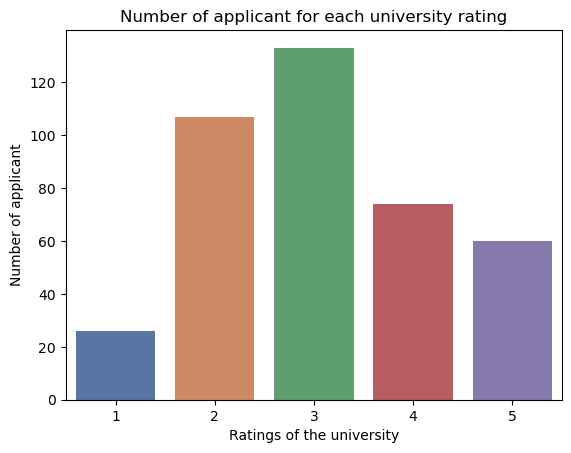

In [22]:
# plotting the number of applicants with their university rating

sns.countplot(x = "University Rating", data = df, color = 'red', palette="deep")
plt.xlabel("Ratings of the university")
plt.ylabel("Number of applicant")
plt.title("Number of applicant for each university rating")
plt.show()

Almost 33% of the total applicant's selected university rating's were 3, which is an average rating. Only 15% of the total applicant's applied to very highly selective universities with the rating of 5. It will be interesting to see how many of them actually got admitted. Very few applicant's applied to low rated universities. This also applies to the highest rated universities. Similarly, most applicants applied to the average rated universities.

This column will definately be very useful for modelling. 

In [23]:
columns_for_modelling.append("University Rating")

<b> 5.1.2 Research </b>

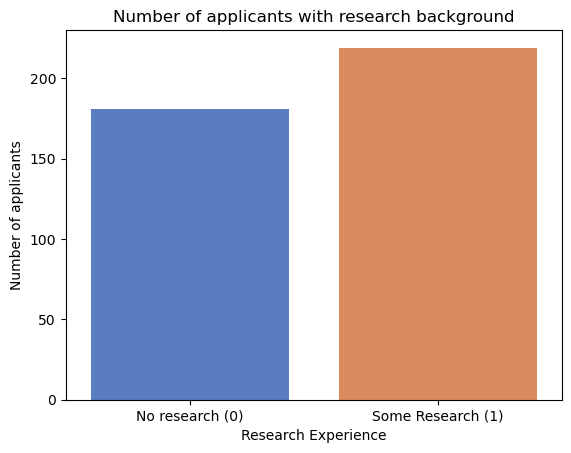

In [24]:
sns.countplot(x="Research", data=df, palette="muted")
plt.xticks(ticks=[0, 1], labels=["No research (0)", "Some Research (1)"])
plt.xlabel("Research Experience")
plt.ylabel("Number of applicants")
plt.title("Number of applicants with research background")
plt.show()

We can see that almost 55% of the applicants have some research background. We will direcly check if there is a relationship between research experience and the chance of admit in further analysis.

<b> 5.1.3 SOP

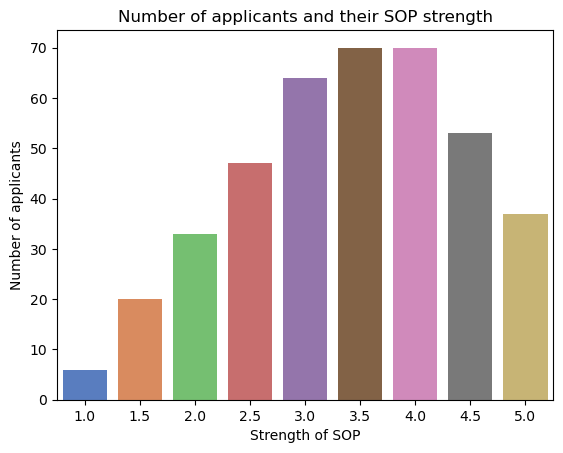

In [25]:
sns.countplot(x="SOP", data=df, palette="muted")
plt.xlabel("Strength of SOP")
plt.ylabel("Number of applicants")
plt.title("Number of applicants and their SOP strength")
plt.show()

We can see that the majority of applicants have their SOP strength around 3-4. Very few applicants have a top tier SOP with maxed out strength (5/5). Also, very few applicants have low quality SOP. 

<b> 5.1.4 Strength of LOR 

In [26]:
# getting the count of LOR strength
count_of_LOR_strength = dict(df["LOR "].value_counts())
count_of_LOR_strength

{3.0: 85, 4.0: 77, 3.5: 73, 4.5: 45, 2.5: 39, 2.0: 38, 5.0: 35, 1.5: 7, 1.0: 1}

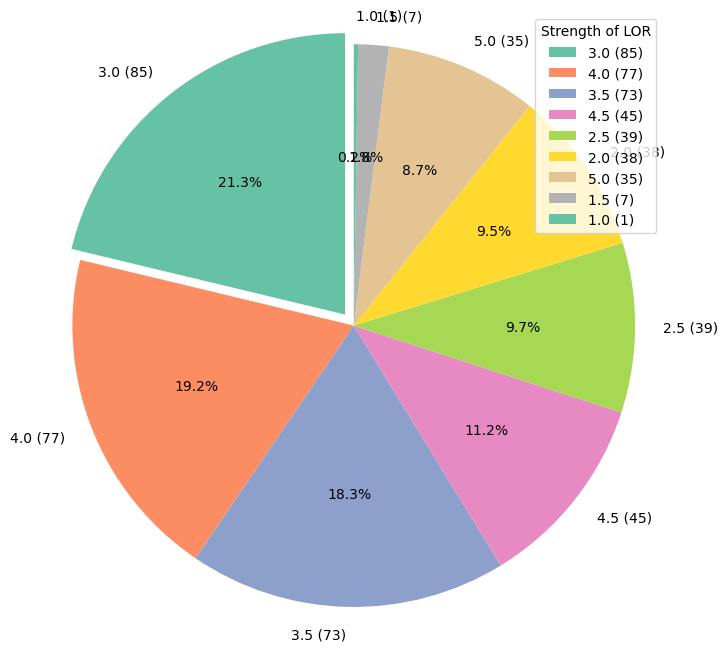

In [27]:
# Pie chart labels and values
labels = list(count_of_LOR_strength.keys())   
values = list(count_of_LOR_strength.values()) 

# Create pie chart
plt.figure(figsize=(8, 8))  
plt.pie(values, labels=[f'{l} ({v})' for l, v in zip(labels, values)], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"), 
        explode=[0.05] + [0] * (len(labels) - 1))  # Explode the first slice

plt.legend(title="Strength of LOR", loc="best")
plt.axis('equal')
plt.show()

We can clearly see from the pie chart that the majority of applicants (85) had a LOR strength of 3, which is kind of average. Very few applicants had a very high  quality LOR with a strength of 5/5.

<b> 5.1.5 GRE Score </b>

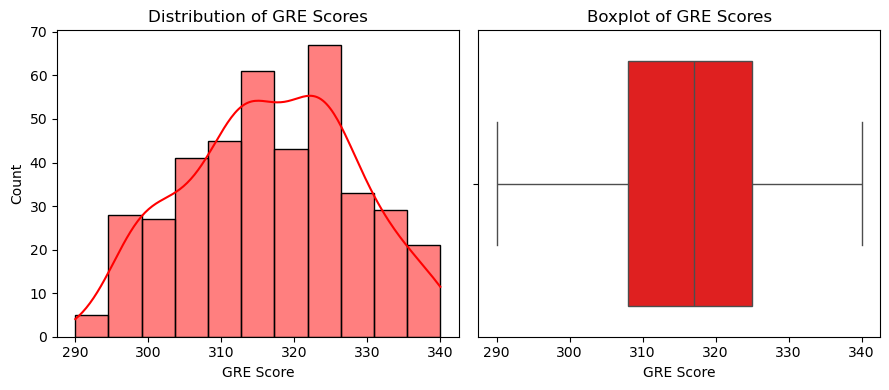

In [28]:
# subplot with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

# first plot
sns.histplot(x="GRE Score", data=df, kde=True, color='red', ax=axes[0])
axes[0].set_title("Distribution of GRE Scores")

# second plot
sns.boxplot(x="GRE Score", data=df, ax=axes[1], color='red')
axes[1].set_title("Boxplot of GRE Scores")

plt.tight_layout()
plt.show()


We can see that the above plots that the distribution of the GRE score doe snot seem to be skewed. It look's almost like a normal distribution. There do not seem to be any outliers. 

<b> 5.1.6 TOEFL Score

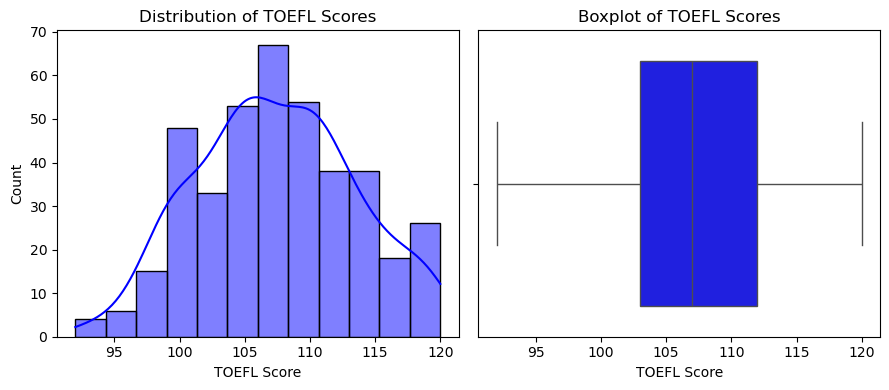

In [29]:
# subplot with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

# first plot
sns.histplot(x="TOEFL Score", data=df, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Distribution of TOEFL Scores")

# second plot
sns.boxplot(x="TOEFL Score", data=df, ax=axes[1], color='blue')
axes[1].set_title("Boxplot of TOEFL Scores")

plt.tight_layout()
plt.show()


We can see that the above plots that the distribution of the TOEFL score doe snot seem to be skewed. It look's almost like a normal distribution. There do not seem to be any outliers. The median TOEFL score is in mid 100s and the highest is 120. Similarly, the histogram also shows that the majority of applicant's TOEFL score is centered around 105.

<b> 5.1.7 CGPA

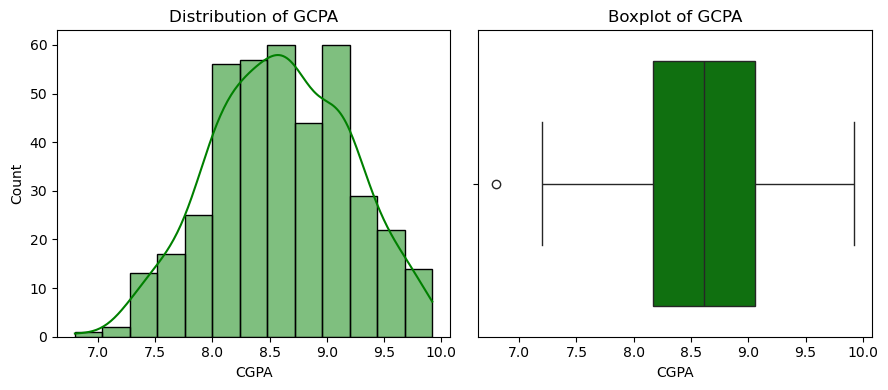

In [30]:
# subplot with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

# first plot
sns.histplot(x="CGPA", data=df, kde=True, color='green', ax=axes[0])
axes[0].set_title("Distribution of GCPA")

# second plot
sns.boxplot(x="CGPA", data=df, ax=axes[1], color='green')
axes[1].set_title("Boxplot of GCPA")

plt.tight_layout()
plt.show()


The distribution of the CGPA is also very similar to the TOEFL and GRE scores. The only exception is that there is an outlier so that the distribution is very slightly left skewed. One of the applicant has cumulative undergradate GPA less than 7. The median CGPA is is high 8s. It will be very interesting to see how CGPA impacts the chance of admit.
We could remove this outlier, but an outlier does not necessarily mean noise. Maybe one of the students performed poorly in their exams due to which, they have a poor CGPA. Outliers, if valid, are real signals and removing data just because they are outliers does not make sense. It depends upon the problem statement as well.

<b> 5.1.8 Chance of Admit

In [31]:
numerical_feaatures

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

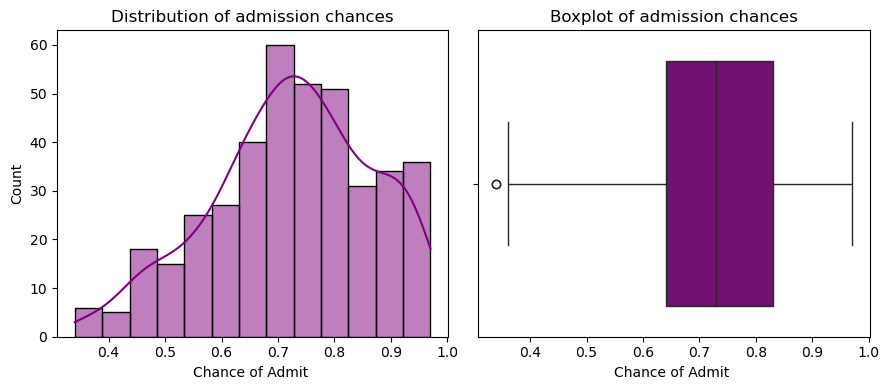

In [32]:
# subplot with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(9, 4))  

# first plot
sns.histplot(x="Chance of Admit ", data=df, kde=True, color='purple', ax=axes[0])
axes[0].set_title("Distribution of admission chances")

# second plot
sns.boxplot(x="Chance of Admit ", data=df, ax=axes[1], color='purple')
axes[1].set_title("Boxplot of admission chances")

plt.tight_layout()
plt.show()


The admission chances looks left skewed slightly with an outlier applicant with less than 40% chances of getting admitted. The median chance of an applicant getting admitted in the dataset is around 75%, which can be seen in the boxplot. Some applicant even have their admission chances in high 90s. Could this be due to them having high CGPA, LORs, SOP, TOEFL score and other factors? We will do multivariate analysis in the next section below to understand how each variable factors in the admission descision.

# 5.2 Multivariate Analysis

In [33]:
categorical_features, numerical_feaatures

(['University Rating', 'Research', 'SOP', 'LOR '],
 ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '])

In [34]:
# sns.scatterplot(x="GRE Score", y = "Chance of Admit ", data = df, hue='Research')
# plt.title("GRE Score vs Chance of Admit with respect to research background")

# sns.scatterplot(x="GRE Score", y = "Chance of Admit ", data = df, hue='SOP')
# plt.title("GRE Score vs Chance of Admit with respect to strength of  SOP")

# sns.scatterplot(x="GRE Score", y = "Chance of Admit ", data = df, hue='University Rating')
# plt.title("GRE Score vs Chance of Admit with respect to University Rating")

# sns.scatterplot(x="GRE Score", y = "Chance of Admit ", data = df, hue='University Rating')
# plt.title("GRE Score vs Chance of Admit with respect to strength of LOR")

In [35]:
df[categorical_features]

,University Rating,Research,SOP,LOR
0,4,1,4.5,4.5
1,4,1,4.0,4.5
2,3,1,3.0,3.5
3,3,1,3.5,2.5
4,2,0,2.0,3.0
...,...,...,...,...
395,3,1,3.5,3.5
396,3,1,3.0,3.5
397,4,1,5.0,4.5
398,3,0,3.5,4.0


In [36]:
# Convert categorical columns to categorical data types
df['Research'] = pd.Categorical(df['Research'])
df['SOP'] = pd.Categorical(df['SOP'])
df['University Rating'] = pd.Categorical(df['University Rating'])
df['LOR '] = pd.Categorical(df['LOR '])

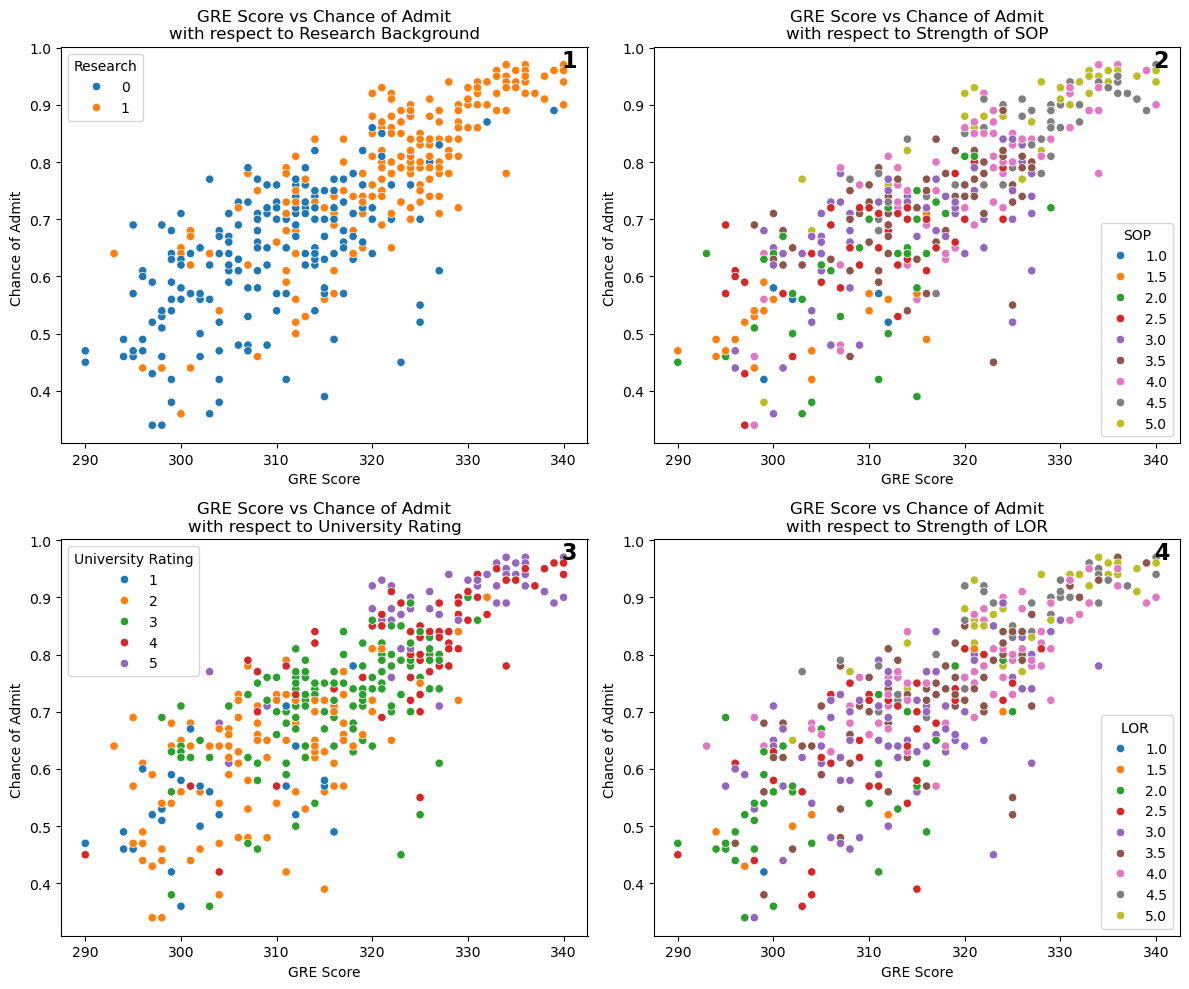

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
sns.scatterplot(x="GRE Score", y="Chance of Admit ", data=df, hue='Research', ax=axs[0, 0])
axs[0, 0].set_title("GRE Score vs Chance of Admit\nwith respect to Research Background")
axs[0, 0].text(0.95, 0.95, '1', fontsize=16, fontweight='bold', transform=axs[0, 0].transAxes)

# Second subplot
sns.scatterplot(x="GRE Score", y="Chance of Admit ", data=df, hue='SOP', ax=axs[0, 1])
axs[0, 1].set_title("GRE Score vs Chance of Admit\nwith respect to Strength of SOP")
axs[0, 1].text(0.95, 0.95, '2', fontsize=16, fontweight='bold', transform=axs[0, 1].transAxes)

# Third subplot
sns.scatterplot(x="GRE Score", y="Chance of Admit ", data=df, hue='University Rating', ax=axs[1, 0])
axs[1, 0].set_title("GRE Score vs Chance of Admit\nwith respect to University Rating")
axs[1, 0].text(0.95, 0.95, '3', fontsize=16, fontweight='bold', transform=axs[1, 0].transAxes)

# Fourth subplot
sns.scatterplot(x="GRE Score", y="Chance of Admit ", data=df, hue='LOR ', ax=axs[1, 1])  
axs[1, 1].set_title("GRE Score vs Chance of Admit\nwith respect to Strength of LOR")
axs[1, 1].text(0.95, 0.95, '4', fontsize=16, fontweight='bold', transform=axs[1, 1].transAxes)

plt.tight_layout()
plt.show()


As we can see in plot 1, applicants with a higher GRE scores have highest likelihood of getting accepted. Also, it is interessting to see that applicants with very high GRE score also tend to have some research background. This is very interesting information as almost every applicant with low GRE scores (less than median score) has no research experience. And, the applicants with higher GRE score and research experience seem to get admitted the most.

Also, in the second plot, we can clearly see that applicants with a higher GRE score and stronger SOPs tend to get admitted the most. This also applies similarly with the strength of recommendation letter. 

Finally, the applicants with very high GRE scores tend to apply to highly selective universities, and also succesfully get admitted. Applicants with low GRE scores also seem to apply to less selective universities, and also have low admission chances. 

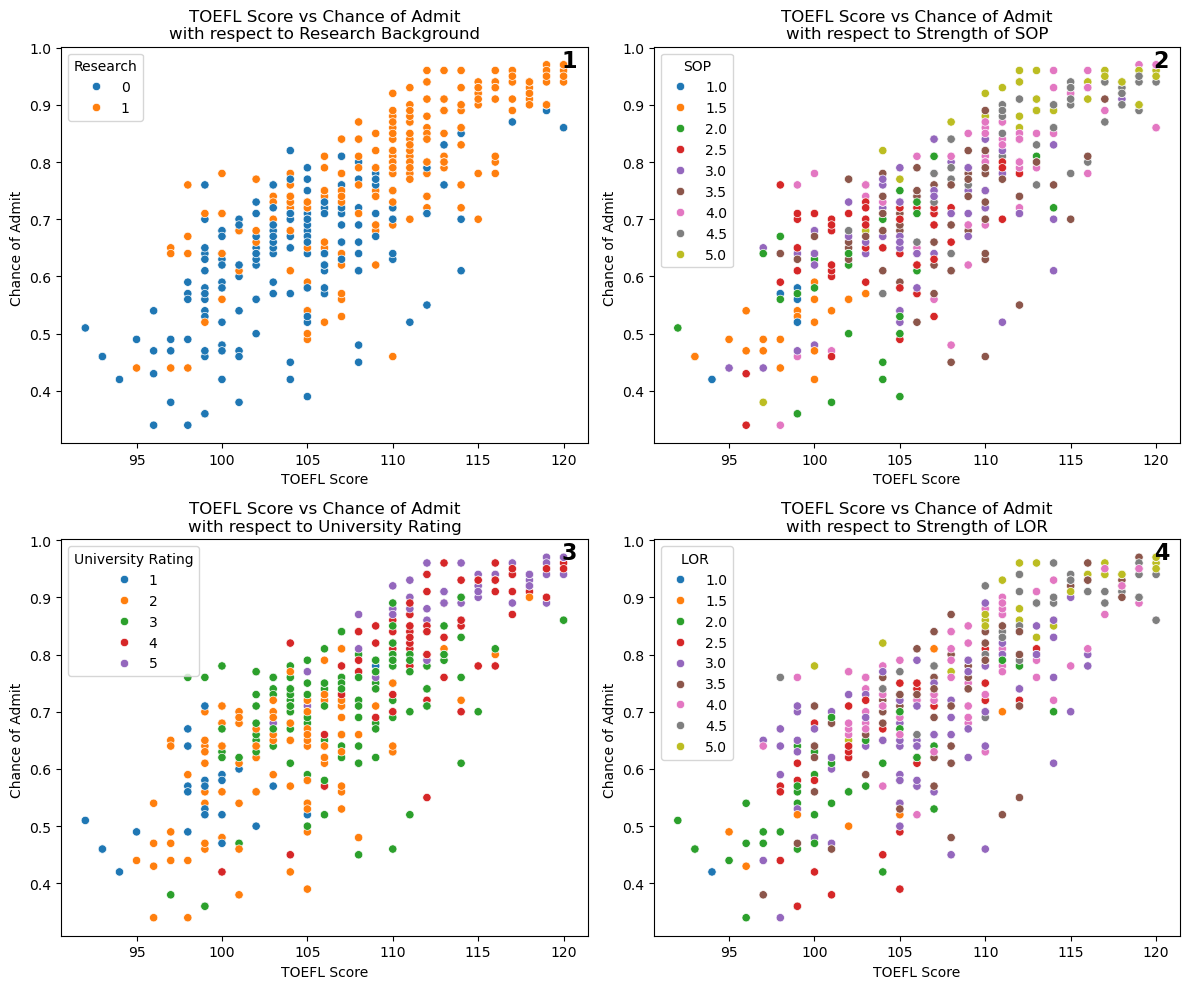

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
sns.scatterplot(x="TOEFL Score", y="Chance of Admit ", data=df, hue='Research', ax=axs[0, 0])
axs[0, 0].set_title("TOEFL Score vs Chance of Admit\nwith respect to Research Background")
axs[0, 0].text(0.95, 0.95, '1', fontsize=16, fontweight='bold', transform=axs[0, 0].transAxes)

# Second subplot
sns.scatterplot(x="TOEFL Score", y="Chance of Admit ", data=df, hue='SOP', ax=axs[0, 1])
axs[0, 1].set_title("TOEFL Score vs Chance of Admit\nwith respect to Strength of SOP")
axs[0, 1].text(0.95, 0.95, '2', fontsize=16, fontweight='bold', transform=axs[0, 1].transAxes)

# Third subplot
sns.scatterplot(x="TOEFL Score", y="Chance of Admit ", data=df, hue='University Rating', ax=axs[1, 0])
axs[1, 0].set_title("TOEFL Score vs Chance of Admit\nwith respect to University Rating")
axs[1, 0].text(0.95, 0.95, '3', fontsize=16, fontweight='bold', transform=axs[1, 0].transAxes)

# Fourth subplot
sns.scatterplot(x="TOEFL Score", y="Chance of Admit ", data=df, hue='LOR ', ax=axs[1, 1])  
axs[1, 1].set_title("TOEFL Score vs Chance of Admit\nwith respect to Strength of LOR")
axs[1, 1].text(0.95, 0.95, '4', fontsize=16, fontweight='bold', transform=axs[1, 1].transAxes)

plt.tight_layout()
plt.show()


We can clearly see that applicants with higher TOEFL scores tend to have a research background and higher chance of admit. Similarly, this pattern is also carrying over to the strength of SOP and LOR. Applicants with stronger SOP and LOR are having a higher TOEFLscore and a higher chance of admit. Similarly, applicants with higher TOEFL score also tend to apply to highly selective universities as well. 

In [39]:
categorical_features, numerical_feaatures

(['University Rating', 'Research', 'SOP', 'LOR '],
 ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '])

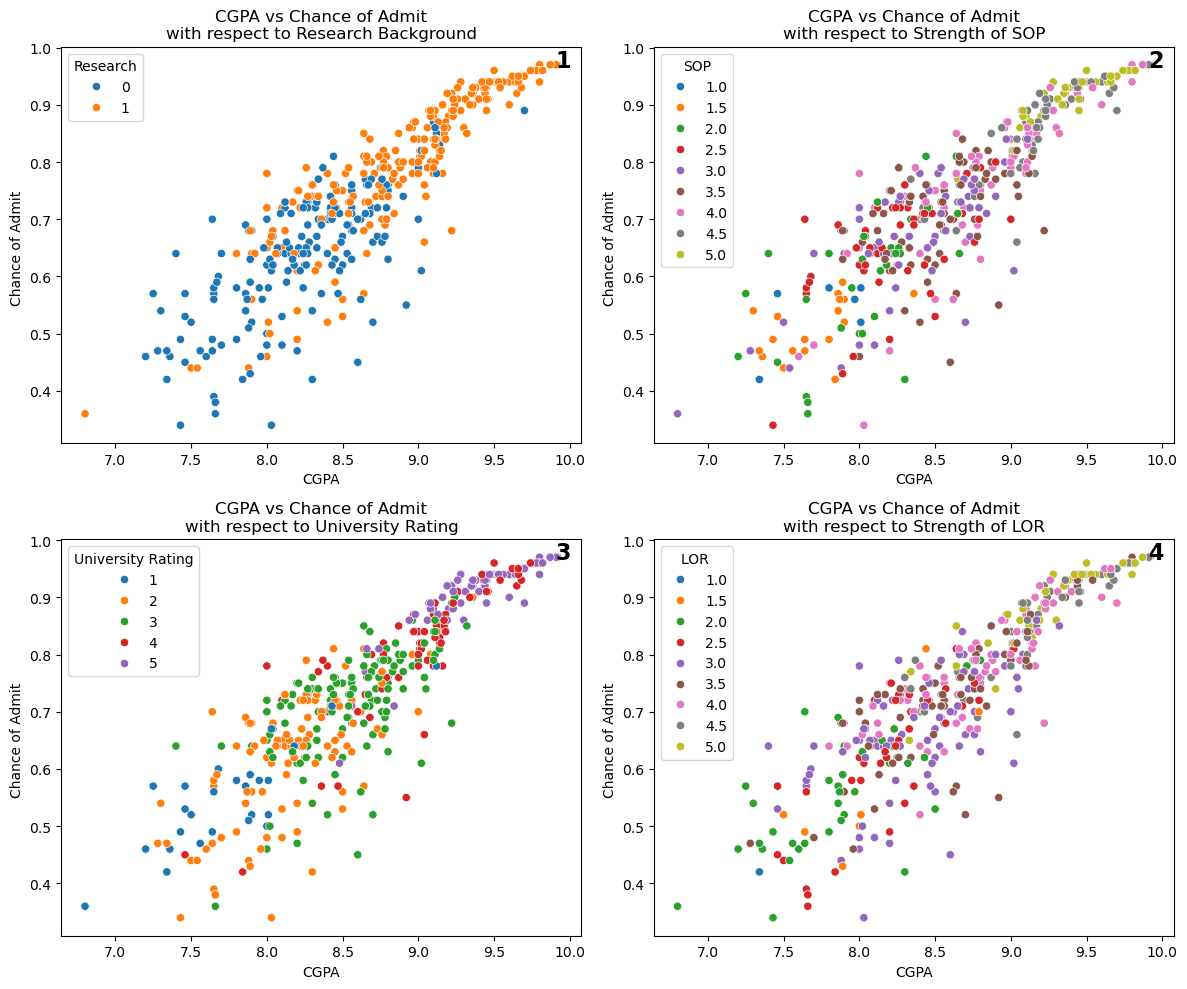

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
sns.scatterplot(x="CGPA", y="Chance of Admit ", data=df, hue='Research', ax=axs[0, 0])
axs[0, 0].set_title("CGPA vs Chance of Admit\nwith respect to Research Background")
axs[0, 0].text(0.95, 0.95, '1', fontsize=16, fontweight='bold', transform=axs[0, 0].transAxes)

# Second subplot
sns.scatterplot(x="CGPA", y="Chance of Admit ", data=df, hue='SOP', ax=axs[0, 1])
axs[0, 1].set_title("CGPA vs Chance of Admit\nwith respect to Strength of SOP")
axs[0, 1].text(0.95, 0.95, '2', fontsize=16, fontweight='bold', transform=axs[0, 1].transAxes)

# Third subplot
sns.scatterplot(x="CGPA", y="Chance of Admit ", data=df, hue='University Rating', ax=axs[1, 0])
axs[1, 0].set_title("CGPA vs Chance of Admit\nwith respect to University Rating")
axs[1, 0].text(0.95, 0.95, '3', fontsize=16, fontweight='bold', transform=axs[1, 0].transAxes)

# Fourth subplot
sns.scatterplot(x="CGPA", y="Chance of Admit ", data=df, hue='LOR ', ax=axs[1, 1])  
axs[1, 1].set_title("CGPA vs Chance of Admit\nwith respect to Strength of LOR")
axs[1, 1].text(0.95, 0.95, '4', fontsize=16, fontweight='bold', transform=axs[1, 1].transAxes)

plt.tight_layout()
plt.show()


The first plot shows us that the almost all of the applicants with higher GCPA have some research background, and they have extremely high chances of admission. In the second and fourth plot, we can clearly see that the applicants with high CGPA tend to have stronger SOP and LOR, and higher chance of admission. Also, applicants with higher CGPA tend to apply to highly selective universities. 

<AxesSubplot: xlabel='Chance of Admit '>

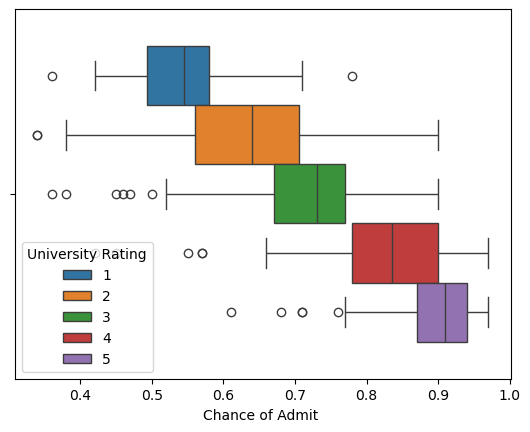

In [41]:
# creating a boxplot for chance of admit with respect to the university rating
sns.boxplot(x='Chance of Admit ', data=df, hue="University Rating")

In [42]:
categorical_features, numerical_feaatures

(['University Rating', 'Research', 'SOP', 'LOR '],
 ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '])

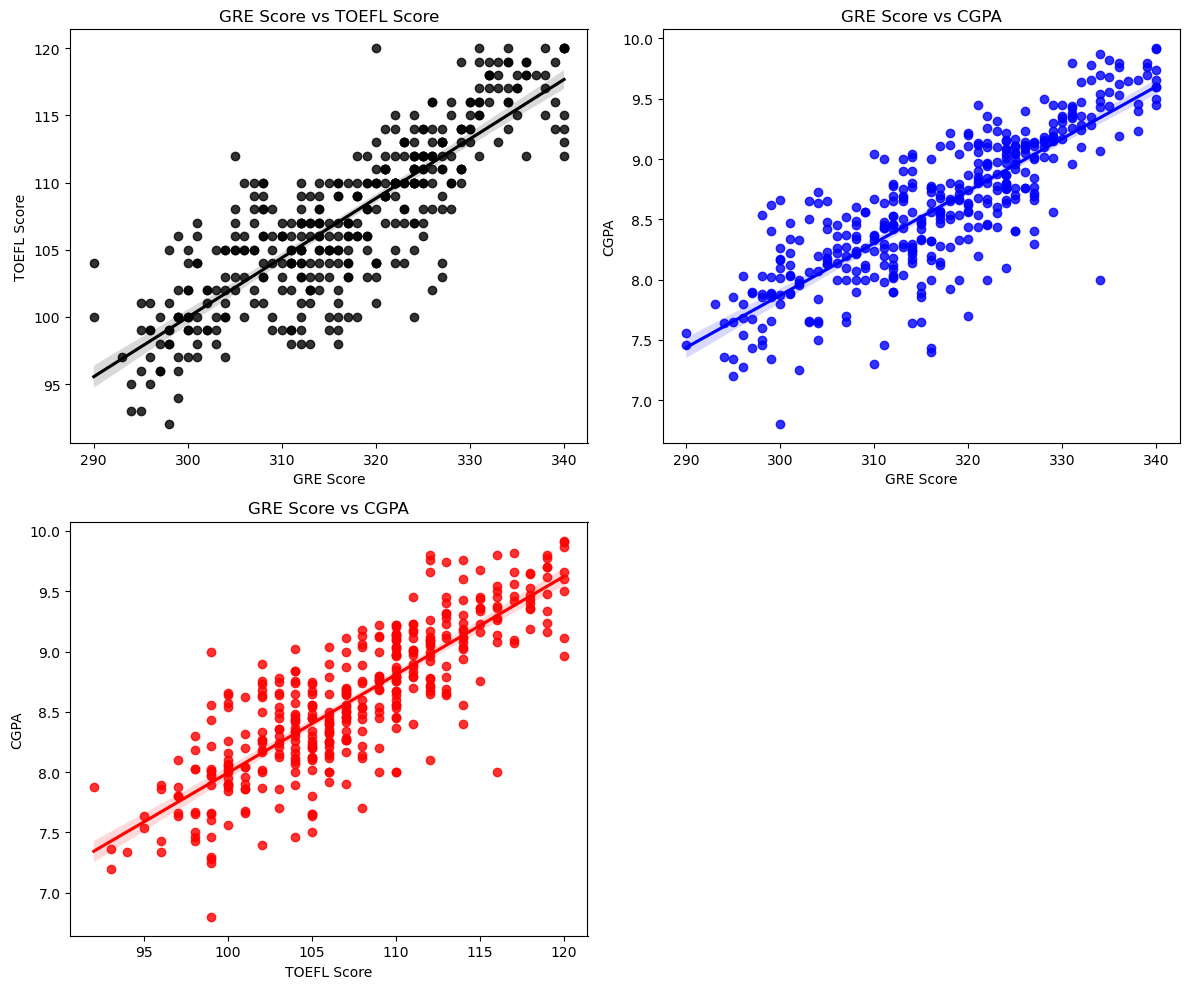

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# GRE Score vs TOEFL Score
sns.regplot(x="GRE Score", y="TOEFL Score", data=df, color='black', ax=axs[0, 0])
axs[0, 0].set_title("GRE Score vs TOEFL Score")

# GRE Score vs CGPA
sns.regplot(x="GRE Score", y="CGPA", data=df, color='blue', ax=axs[0, 1])
axs[0, 1].set_title("GRE Score vs CGPA")

# GRE Score vs CGPA
sns.regplot(x="TOEFL Score", y="CGPA", data=df, color='red', ax=axs[1, 0])
axs[1, 0].set_title("GRE Score vs CGPA")

# make the final plot empty
axs[1, 1].axis('off') 

plt.tight_layout()
plt.show()

The subplot above showcases that applicant with high TOEFL scores tend to perform very well on GRE. Also, applicants with high GCPA tend to perform well on tests like TOEFL and GRE. It will be interesting to see which of the parameters will most impact our ML model's descision making.

# 6. Stastistical Analysis

### 6.1 Correlation Analysis between Continuous Features

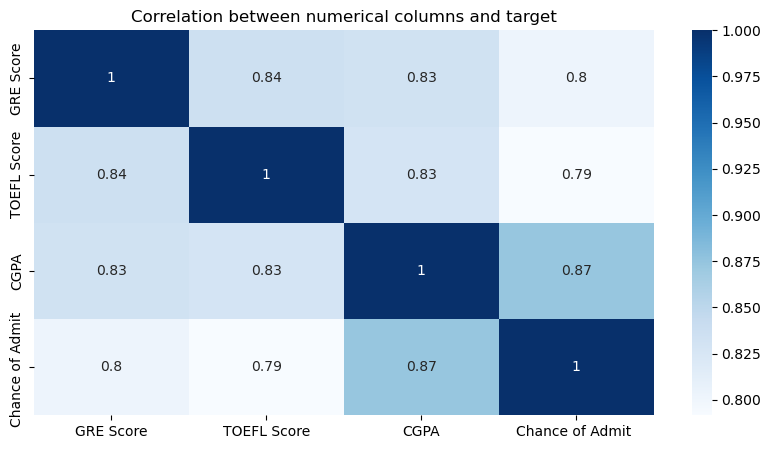

In [44]:
# plotting a heatmap for pearson correlation coefficent for numerical columns
plt.figure(figsize=(10, 5))
plt.title("Correlation between numerical columns and target")
sns.heatmap(df[numerical_feaatures].corr(), annot=True, cmap='Blues')
plt.show()

Here, we showcase the pearson correlation coefficient between numerical columns and target. Here, the correlation coefficient (r) ranges from -1 to 1. The magnitude of the correlation coefficient represents how strong the relationship between two continuous variables is. Similarly, the negative/positive sign represents the direction. If the correlation coefficient value is close to -1, it indicates that two varuables are strongly negatively correlation and rise in one variable will lead to a consistent drop in another variable, and vice versa. If the correlation coefficient is 0, there is no linear relationship between two varaibles.

From the correlation matrix above, we can see that all features are strongly positively correlated with the target. Also, the features are also strongly linearly correlated. Could our model suffer from `multicollinearity`? Because, our independed variables seem to be very highly correlated wit each other, and highly correlated features that are similarly corelated with target may provide redundant information to our model.

An example to explain the impact of multicollinearity can be given below.

I am sujan, and I enjoy drinking beer and feel happy while I watch cricket while I drink beer. Now, it is very difficult to identify the impact drinking beer and watching cricket have on my happiness. This is because, the more cricket I watch, the more beer I want to drink, and the more happy I become. So, let say we are training a linear regression model to predict happiness (Y) with respect to the the amount of cricket I watch (X1) and the amount of beer I drink (X2).

So, we have:

    Y (happiness) = weight1 * X1 + weight2 * X2 + bias

Here, weight1 is the increase of Y with respect to X1 and weight2 is the increase of Y with respect to X2. Since X1 and X2 are strongly correlated with each other, a changing X1 would also lead to chaning X2. Therefore, it becomes difficult to evaluate the individual impact of X1 and X2 on Y. Sure, it may not impact the accuracy of our linear regression model but it will directly impact the interpretation. We may want to evaluate the coefficients for each feature to undestand the impact of each feature on the target variables. Multicollinearity makes it difficult to do this.

In [45]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### 6.2 Chi-squared Test of Independence

The chi-squared test of independence is a statistical way of determining whether any two categorical features are related or not.

We will apply this test on each different pairs of categorical feature and understand if they are related or not.

If any of the two variables are related to each other, the probability of one variable having a certain value is very much dependent upon the value of the anoother variable.

In this test, we need to understand three key terms:


 `-> Categorical features (the two categorical features that are of interest to us. Like University Rating vs Research)`

 `-> Observed Frequencies (The observed frequencies for each categorical combination)`
 
 `-> Expected Frequencies (If there were no relationship between these two, the count of occurrences we would typically expect.) `


 If these two variables are not related, then the observed frequency will be similar to expected frequency.

In [46]:
test_df = categorical_df.head(10)[["University Rating", "Research"]]

<b> Let's do implement this test from scratch

In [47]:
test_df

,University Rating,Research
0,4,1
1,4,1
2,3,1
3,3,1
4,2,0
5,5,1
6,3,1
7,2,0
8,1,0
9,3,0


<b> Creating a contigency table </b>

The unique values we have in `University Rating` = [1, 2, 3, 4, 5]

The unique values we have in `Research` = [0, 1]


Now, for each of these different pairs, we will get the observed frequencies, which is essentially our contingency table

In [48]:
# creating contingency table
contingency_table = pd.crosstab(test_df['University Rating'], test_df['Research'])

# Add row totals
contingency_table['Row Total'] = contingency_table.sum(axis=1)

# Add column totals
contingency_table.loc['Column Total'] = contingency_table.sum(axis=0)


contingency_table

Research,0,1,Row Total
University Rating,,,
1,1,0,1
2,2,0,2
3,1,3,4
4,0,2,2
5,0,1,1
Column Total,4,6,10


<b> Explaining the contingency table </b>

Here, The second and third columns essentially contain the observed frequencies for different combinations of categorical columns (1 univesity rating and 0 research, 2 university rating and 1 research etc.).

<b> Calculating Expected Frequencies </b>

Eij = (row total of cell_ij) * (Column total of cell_ij) / TOTAL

For instance, Expected frequency for University rating 1 and research 0 (E_10) = ((1+0) * (1+2+1)) / 10 = (1*4) / 10 = 0.4


So, this way, we have the actual frequences and the expected frequencies. Now, we can compute the Chi-squared.


$$
% \chi^2 = \sum_{i=1}^n \frac{(O_i - E_i)^2}{E_i}

\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$




<b> Calculate the degree of freedom </b>

degrees of freedom (df) = (number of values in category 1 - 1) * (number of unique values in category 2 - 1)

Finally, we calculate the critical value. Using the df of 4, and a significance level of 0.05, we calculate critical value. 

To conclude:

if chi_squared_stat > critical_value:

        print("There is a significant relationship between University Rating and Research.")

else:

        print("There is no significant relationship between University Rating and Research.")

The Chi-squared statistic helps us measure how much the oserved and expected frequencies vary. The degree of freedom helps us understand the number of values in our data that can vary independently. We the calculate the critical value. If the chi squared statistic is greater than critical value, there is a relationship between two categorical features. Otherwise there is not and we accept null hypothesis. Let's implement this in python.

In [49]:
categorical_df

,University Rating,Research,SOP,LOR
0,4,1,4.5,4.5
1,4,1,4.0,4.5
2,3,1,3.0,3.5
3,3,1,3.5,2.5
4,2,0,2.0,3.0
...,...,...,...,...
395,3,1,3.5,3.5
396,3,1,3.0,3.5
397,4,1,5.0,4.5
398,3,0,3.5,4.0


In [50]:
from scipy.stats import chi2_contingency, chi2

# our significance level
alpha=0.05

In [51]:
def perform_chi_suqared_testing(column1: str, column2: str, alpha=0.05):
    '''
    Perform chi squared test of independence and decide whether to accept or reject null hypothesis

    Parameters:
    column1 (str) -> the name of first column
    column2 (str) -> the name of second column

    alpha (float) -> the significance level

    Returns:
    dict -> a detail data for the experiment including the conclusion    
    '''
    contingency_table = pd.crosstab(df[column1], df[column2])

    # Perform chi-square test
    chi2_stat, _, dof, expected = chi2_contingency(contingency_table)

    # Calculate critical value
    critical_value = chi2.ppf(1 - alpha, dof)

    return {
        "chi squared stat": chi2_stat,
        "degree of freedom": dof,
        "critical_value": critical_value,
        "reject_null_hypothesis": critical_value < chi2_stat
    }

In [52]:
perform_chi_suqared_testing("University Rating", "Research")

{'chi squared stat': 83.3062176776905,
 'degree of freedom': 4,
 'critical_value': 9.487729036781154,
 'reject_null_hypothesis': True}

Based on this experiment, there is a statistical significance between University Rating and Research

In [53]:
perform_chi_suqared_testing("University Rating", "SOP")

{'chi squared stat': 422.822364752209,
 'degree of freedom': 32,
 'critical_value': 46.19425952027847,
 'reject_null_hypothesis': True}

Based on this experiment, there is a relationship between University Rating and Research

In [54]:
perform_chi_suqared_testing("University Rating", "LOR ")

{'chi squared stat': 265.2550252586106,
 'degree of freedom': 32,
 'critical_value': 46.19425952027847,
 'reject_null_hypothesis': True}

Based on this experiment, there is a relationship between University Rating and LOR

In [55]:
categorical_df.columns

Index(['University Rating', 'Research', 'SOP', 'LOR '], dtype='object')

In [56]:
perform_chi_suqared_testing("Research", "SOP")

{'chi squared stat': 81.31277194912109,
 'degree of freedom': 8,
 'critical_value': 15.50731305586545,
 'reject_null_hypothesis': True}

Based on this experiment, there is a relationship between Research and SOP.

In [57]:
perform_chi_suqared_testing("Research", "LOR ")

{'chi squared stat': 66.87127812690443,
 'degree of freedom': 8,
 'critical_value': 15.50731305586545,
 'reject_null_hypothesis': True}

Based on this experiment, there is a relationship between Research and LOR.

In [58]:
perform_chi_suqared_testing("SOP", "LOR ")

{'chi squared stat': 442.67064474120525,
 'degree of freedom': 64,
 'critical_value': 83.67526074272097,
 'reject_null_hypothesis': True}

Based on this experiment, there is a relationship between SOP and LOR.

In [59]:
categorical_features

['University Rating', 'Research', 'SOP', 'LOR ']

In [60]:
numerical_feaatures

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

# Modelling

<b> This section will contain different experiments for training our models with our data.  </b>

In [61]:
# importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.inspection import permutation_importance

In [62]:
# reading the file
df = pd.read_csv("dataset.csv")

In [63]:
print(df.shape)
df.head()

(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [64]:
# these are our categorical and numerical features
categorical_features = ['University Rating', 'Research', 'SOP', 'LOR ']
numerical_features = ['GRE Score', 'TOEFL Score', 'CGPA']

<b> Since we only have 400 rows of data, we will first randomly split the data to get an independent test dataset to evaluate the model performance.

In [65]:
# dropping this useless column.
df.drop("Serial No.", axis = 1, inplace=True)

In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=100/400) # get 100 random rows for testing

In [67]:
# tranining dataframe
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
247,311,104,2,2.5,3.5,8.48,0,0.71
110,305,108,5,3.0,3.0,8.48,0,0.61
16,317,107,3,4.0,3.0,8.70,0,0.66
66,327,114,3,3.0,3.0,9.02,0,0.61
153,324,105,3,3.0,4.0,8.75,0,0.79


In [68]:
# testing dataframe
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
209,301,104,3,3.5,4.0,8.12,1,0.68
280,311,102,3,4.5,4.0,8.64,1,0.68
33,340,114,5,4.0,4.0,9.60,1,0.90
210,325,108,4,4.5,4.0,9.06,1,0.79
93,301,97,2,3.0,3.0,7.88,1,0.44


# Data Standardization
<b> for numerical features </b>

Through our data analysis, we found out that our features have different scales. The scale of GRE score and TOEFL score, and CGPA is very different. If we were to provide this features to our model, the features with larger scale would unequally impact the model. Therefore, we standarize the feature using Standard Scaling, which will bring all features to a similar distribution with a mean close to 0 and a unit standard deviation.


The formula for feature standardization (also called Z-score normalization) is:

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- $z$ is the standardized value
- $x$ is the original value
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature


Since we will be applying K-fold cross validation while optimizing our model, we need to ensure that we don't scale the train dataframe at once, as Standardization should only apply to training data and not validation data. By calculating the mean and standard deviation of the training data, we normalize the features and apply the same mean and standard dev to do the same thing to validation and test data. Otherwise, there will be a problem of data leakage as our data (mean and std) from train dataframe will essentially be leaked to the validation/test data, which may not represent the true performance of model. We will use pipelines to perform Standardization and applying K-fold cross validation. 


# Encoding Categorical Features

Our Linear Regression model cannot work with categorical features by default. We would need to encode them. Two of the most common and simple encoding techniques would be `Label Encoding` and `One-Hot Encoding`. Since our categorical columns have integer/float values in ordinal fashion, we can simply skip this step for our dataset.

# Model Training with K-FOLD Cross Validation (Linear Regression)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
target = 'Chance of Admit '

In [71]:
# X = df.drop(target, axis=1)
# y = df[target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# model = LinearRegression()
# scaler = StandardScaler().fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# model.fit(X_train, y_train)
# train_preds = model.predict(X_train)
# test_preds = model.predict(X_test)

# print(r2_score(train_preds, y_train))
# print(r2_score(test_preds, y_test))

In [72]:
features = train.columns[:-1]
target = train.columns[-1]

print("Features: ", features)
print("Target: ", target)

Features:  Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')
Target:  Chance of Admit 


In [73]:
# creating feature matrix and response/target vector
X_train = train[features]
y_train = train[target]

In [74]:
# this pipeline with scaler object will apply scaler to each train split only to calculate -
# mean and std, and use that to normalize ttrain and validation splits.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)

    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [75]:
# k fold cross-validation
'''
Here, we select split=4 so that our dataset with 300 rows will be split 4 times (225:75) randomly and 
the subsplit will be used as train dataframe and validation dataframe
'''
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [76]:
# our results
# here, the scoring parameter will enable us to use the model with least correspodnig error 
kf_crossval_results = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')

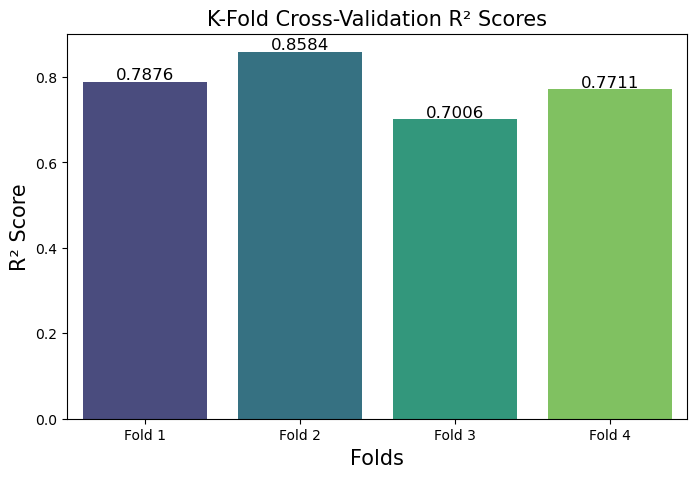

In [77]:
# Create a DataFrame with the fold numbers and R² scores
cv_results_df = pd.DataFrame({
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4'],
    'R²': kf_crossval_results
})

# Plotting using Seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Fold', y='R²', data=cv_results_df, palette='viridis')

# lets uss add the values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
plt.title('K-Fold Cross-Validation R² Scores', fontsize=15)
plt.xlabel('Folds', fontsize=15)
plt.ylabel('R² Score', fontsize=15)
plt.show()

Since we are not really optimizing hyperparameters and we already have a seperate independent test data, there is not really much to do with cross validation. But, even so, this technique helps us check model stability with differnet folds of validation set. We can see that for the second fold, the model has best R-squared on the fold's validation set. Perhaps, the model found that set easier to make predictions on. 

In [78]:
# training the model on entire data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['GRE Score', 'TOEFL Score',
                                                   'CGPA']),
                                                 ('cat', 'passthrough',
                                                  ['University Rating',
                                                   'Research', 'SOP',
                                                   'LOR '])])),
                ('model', LinearRegression())])

In [79]:
# lets make predictions on training and test samples
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(test[features])

In [80]:
def evaluate_regression_model(y, y_pred):
    '''
    This function will evaluate the actual values and the corresponding predictions using various metridcs
    
    '''
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    metrics = {
        'Metric': ['R² Score', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'],
        'Value': [r2, mse, mae, rmse]
    }
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [81]:
evaluate_regression_model(y_train, train_preds)

,Metric,Value
0,R² Score,0.795885
1,Mean Squared Error (MSE),0.003912
2,Mean Absolute Error (MAE),0.043844
3,Root Mean Squared Error (RMSE),0.062549


In [82]:
evaluate_regression_model(test[target], test_preds)

,Metric,Value
0,R² Score,0.816115
1,Mean Squared Error (MSE),0.004341
2,Mean Absolute Error (MAE),0.047078
3,Root Mean Squared Error (RMSE),0.065885


This is a good start. The model has an R-squared of 0.79 on the test data.

In [83]:
our_model = pipeline.named_steps['model'];our_model

LinearRegression()

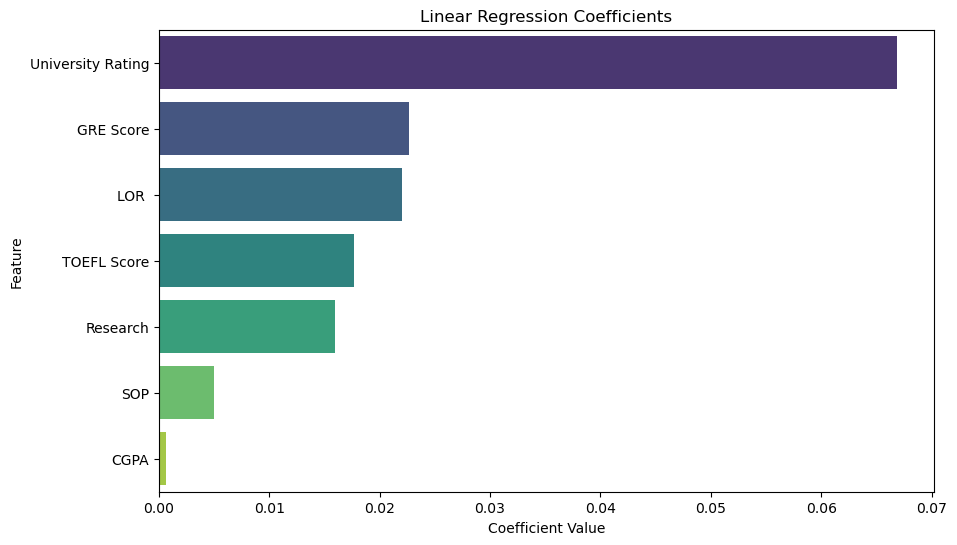

In [84]:
# Extract coefficients
coefficients = our_model.coef_
features = pipeline.feature_names_in_

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

coef_df.sort_values("Coefficient", ascending=False, inplace=True)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

The coefficients are very important for interpreting linear regression. The coefficients that are positive indicate that with the increasing feature, the target also increases. Similarly, if the cofficient is negative, the increasing feature leads to decreasing target. If the coefficient is close to 0, then it represents that the feature is having no linera impact on the target.

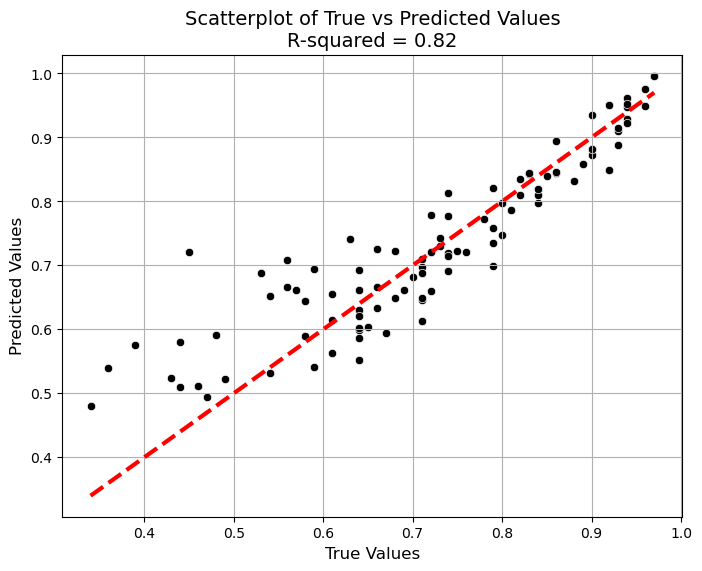

In [85]:
r_squared = r2_score(test[target], test_preds)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test[target], y=test_preds, color='black')
plt.title(f'Scatterplot of True vs Predicted Values\nR-squared = {r_squared:.2f}', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)

# let us addd a grid and a 45-degree reference line
plt.grid(True)
plt.plot([min(test[target]), max(test[target])], [min(test[target]), max(test[target])], 'r--', linewidth=3)
plt.show()

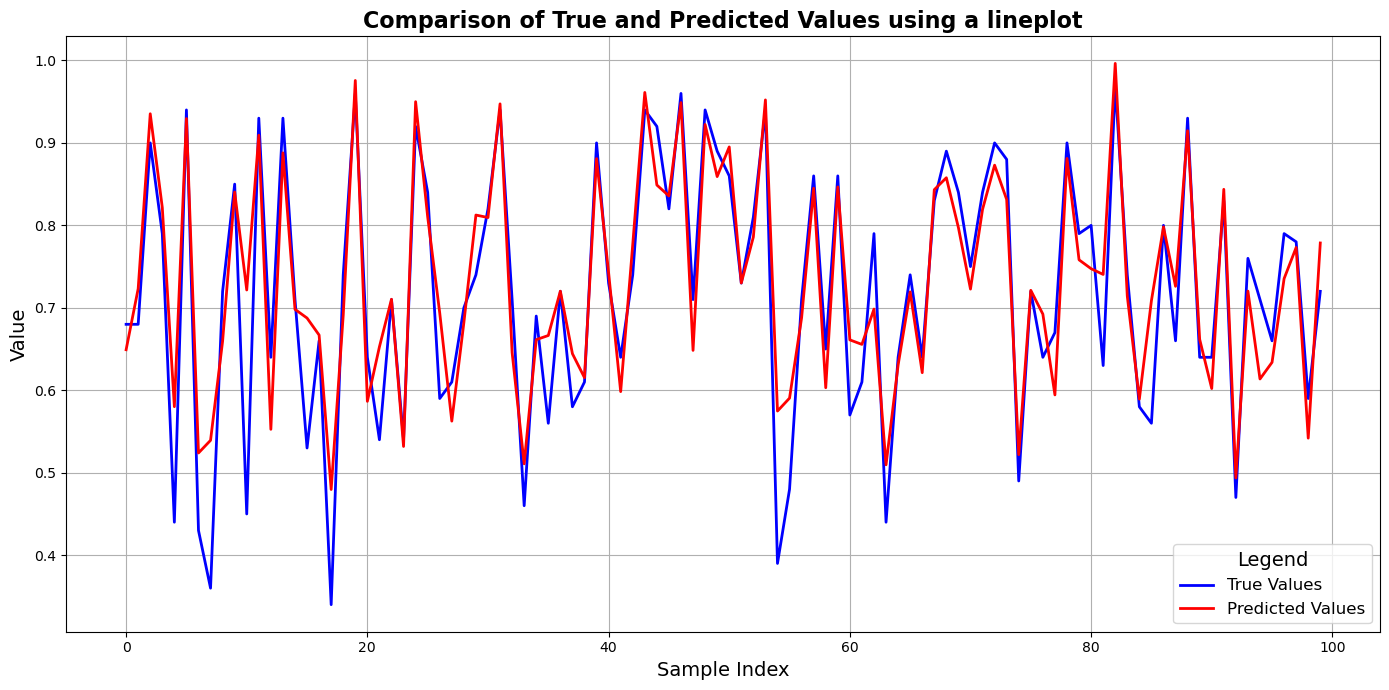

In [86]:
# Plot true values vs predicted values lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(x=range(test.shape[0]), y=test[target], color='blue', label='True Values', linewidth=2)
sns.lineplot(x=range(test.shape[0]), y=test_preds, color='red', label='Predicted Values', linewidth=2)
plt.title('Comparison of True and Predicted Values using a lineplot', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Legend', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


# Saving the linear regression pipeline

In [87]:
import pickle

# Save the pipeline to a file
with open('linear_regression_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [88]:
# Load the pipeline from the file
with open('linear_regression_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [89]:
evaluate_regression_model(test[target], loaded_pipeline.predict(test[features]))

,Metric,Value
0,R² Score,0.816115
1,Mean Squared Error (MSE),0.004341
2,Mean Absolute Error (MAE),0.047078
3,Root Mean Squared Error (RMSE),0.065885


We will load this pickled object in our streamlit app to perform realtime predictions.

In [90]:
a_single_sample = test.iloc[[44]][features]
a_single_sample

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
82,320,110,5,5.0,4.5,9.22,1


In [91]:
print("Predicted chance of admit for this applicant: ", loaded_pipeline.predict(a_single_sample))

Predicted chance of admit for this applicant:  [0.84893303]


In [92]:
a_single_sample.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [93]:
# making a copy for later use
linear_regression = loaded_pipeline

# Polynomial Regression

In [94]:
# importing dependencies for polynomial regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

In [95]:
# column transformer will essentially help us manipulate columns in the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scaling numerical features only and -
        ('cat', 'passthrough', categorical_features)  # - leeaving categorical features as they are
    ])

### How does performance change with respect to the degree of the polynomial regression?

In [96]:
r2_train = []
r2_test = []
mae_train = []
mae_test = []

for deg in range(1, 6):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Scaling the features
        ('poly', PolynomialFeatures(degree=deg, include_bias=True)),  # Polynomial feature transformation
        ('model', Ridge(alpha=1.0))  # Ridge regression for L2 regularization (alpha is the regularization strength)
    ])

    pipeline.fit(X_train, y_train)     # fitting on training data
    train_preds = pipeline.predict(X_train)     # making predictions on train data
    test_preds = pipeline.predict(test[features]) # making predictions on test data

    # appending training and testing r-squared and MAE for later comparision
    r2_train.append(r2_score(y_train, train_preds))
    r2_test.append(r2_score(test[target], test_preds))

    mae_train.append(mean_absolute_error(y_train, train_preds))
    mae_test.append(mean_absolute_error(test[target], test_preds))

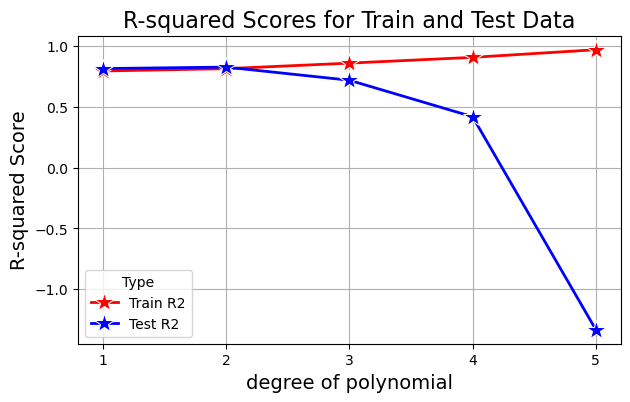

In [97]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(x=range(1, 6), y=r2_train, ax=ax, color='red', marker="*", linewidth=2, markersize=15, label='Train R2')
sns.lineplot(x=range(1, 6), y=r2_test, ax=ax, color="blue", marker="*", linewidth=2, markersize=15, label='Test R2')
ax.set_title('R-squared Scores for Train and Test Data', fontsize=16)
plt.xticks(range(1, 6))
ax.set_xlabel('degree of polynomial', fontsize=14)
ax.set_ylabel('R-squared Score', fontsize=14)
ax.grid(True)
ax.legend(title='Type')
plt.show()

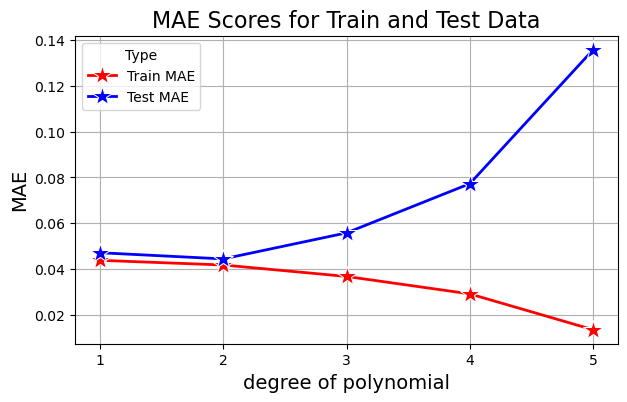

In [98]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(x=range(1, 6), y=mae_train, ax=ax, color='red', marker="*", linewidth=2, markersize=15, label='Train MAE')
sns.lineplot(x=range(1, 6), y=mae_test, ax=ax, color="blue", marker="*", linewidth=2, markersize=15, label='Test MAE')
ax.set_title('MAE Scores for Train and Test Data', fontsize=16)
plt.xticks(range(1, 6))
ax.set_xlabel('degree of polynomial', fontsize=14)
ax.set_ylabel('MAE', fontsize=14)
ax.grid(True)
ax.legend(title='Type')
plt.show()

We can clearly see that, after two degrees, the polynomial regression is overfitting. Therefore, we will conclude with using the 2-deg polynomial regression.

In [99]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Scaling the features
    ('poly', PolynomialFeatures(degree=2, include_bias=True)),  # Polynomial feature transformation
    ('model', Ridge(alpha=1.0))  # Ridge regression for L2 regularization (alpha is the regularization strength)
])

# fitting on training data
pipeline.fit(X_train, y_train)

# making predictions on train data
train_preds = pipeline.predict(X_train)

# making predictions on test data
test_preds = pipeline.predict(test[features])

In [100]:
evaluate_regression_model(y_train, train_preds)

,Metric,Value
0,R² Score,0.814929
1,Mean Squared Error (MSE),0.003547
2,Mean Absolute Error (MAE),0.041792
3,Root Mean Squared Error (RMSE),0.059560


In [101]:
evaluate_regression_model(test[target], test_preds)

,Metric,Value
0,R² Score,0.827844
1,Mean Squared Error (MSE),0.004064
2,Mean Absolute Error (MAE),0.044439
3,Root Mean Squared Error (RMSE),0.063749


This model has better results than the vanilla linear regression.

In [102]:
our_model = pipeline.named_steps['model'];our_model

Ridge()

In [103]:
poly_features = pipeline.named_steps['poly']

In [104]:
our_model.coef_

array([ 0.        , -0.00190611,  0.01154757,  0.04478479, -0.01098508,
        0.01711643,  0.0656257 , -0.03001861, -0.00158256, -0.00196728,
       -0.00496076, -0.00123698,  0.00507779,  0.00082048,  0.00539725,
        0.00373063, -0.01341376, -0.0025697 ,  0.00887952,  0.01088095,
       -0.00715779,  0.00313401,  0.01022925,  0.01384603,  0.00590577,
       -0.01142596, -0.00504779,  0.000671  ,  0.01935579, -0.00499959,
        0.01711643, -0.00763106,  0.00309983, -0.01532981, -0.00444815,
        0.01079207])

In [105]:
poly_features.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x0^2', 'x0 x1',
       'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x1^2', 'x1 x2',
       'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x2^2', 'x2 x3', 'x2 x4',
       'x2 x5', 'x2 x6', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x4^2',
       'x4 x5', 'x4 x6', 'x5^2', 'x5 x6', 'x6^2'], dtype=object)

In [106]:
our_model.intercept_

0.62691441759739

In [107]:
pipeline.feature_names_in_

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


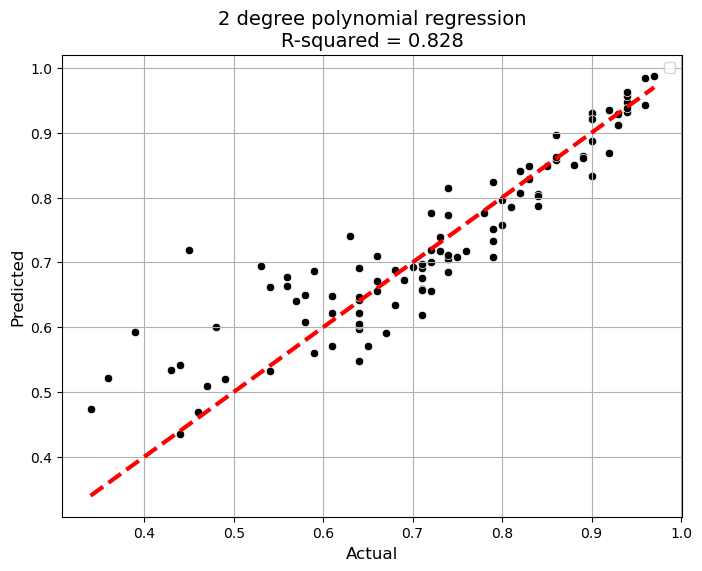

In [108]:
r_squared = r2_score(test[target], test_preds)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test[target], y=test_preds, color='black')
plt.title(f'2 degree polynomial regression\nR-squared = {r_squared:.3f}', fontsize=14)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)

# let us addd a grid and a 45-degree reference line
plt.grid(True)
plt.legend(fontsize=10)
plt.plot([min(test[target]), max(test[target])], [min(test[target]), max(test[target])], 'r--', linewidth=3)
plt.show()


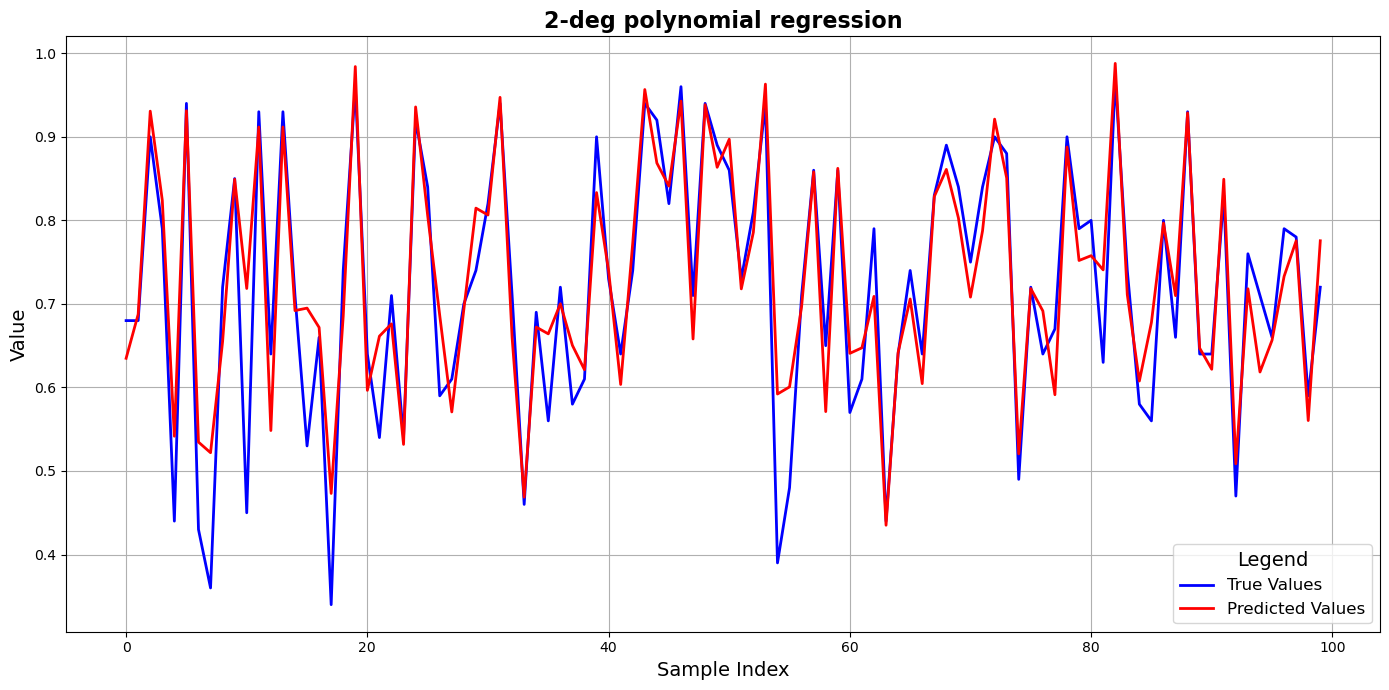

In [109]:
# Plot true values vs predicted values lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(x=range(test.shape[0]), y=test[target], color='blue', label='True Values', linewidth=2)
sns.lineplot(x=range(test.shape[0]), y=test_preds, color='red', label='Predicted Values', linewidth=2)
plt.title('2-deg polynomial regression', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Legend', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


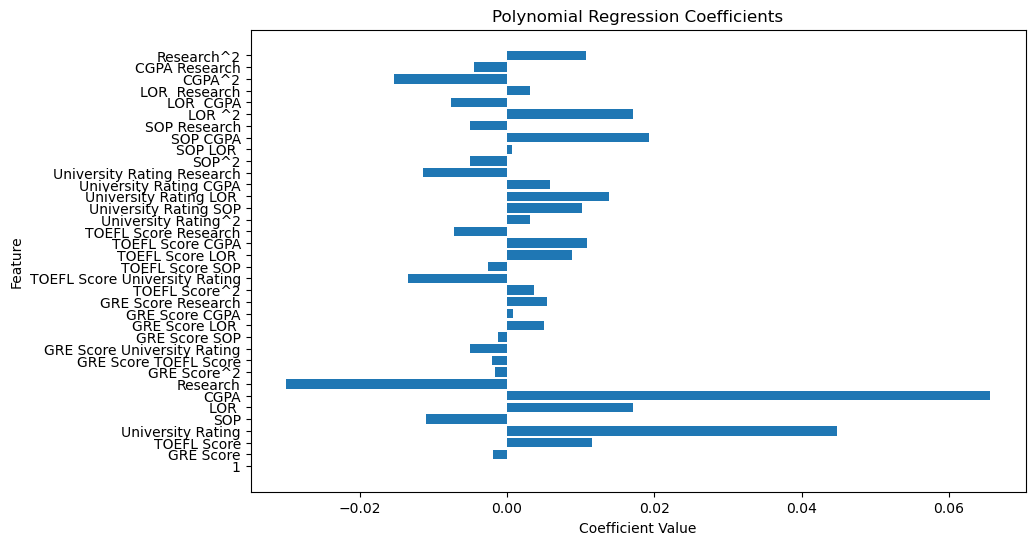

In [110]:
# Extract coefficients
model = pipeline.named_steps['model']
coefficients = model.coef_
feature_names = pipeline.named_steps['poly'].get_feature_names_out(X_train.columns)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Polynomial Regression Coefficients')
plt.show()

# Permutation Feature Importance

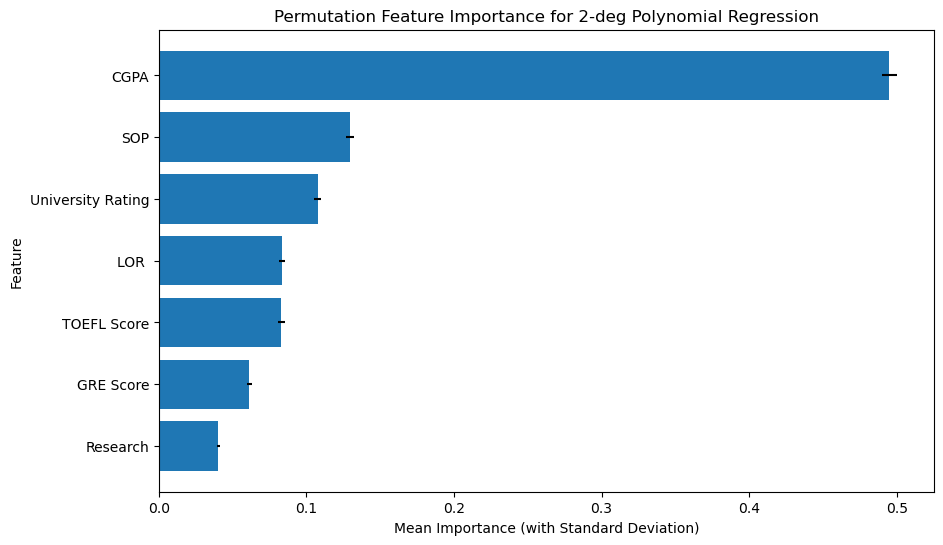

In [111]:
result = permutation_importance(pipeline, test[features], test[target], n_repeats=100, random_state=42, scoring='neg_mean_absolute_error')

# Extract feature importances and sort them
importances = result.importances_mean

importances = importances / np.sum(importances)

std = result.importances_std
features = test[features].columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], xerr=std[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Mean Importance (with Standard Deviation)")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance for 2-deg Polynomial Regression")
plt.gca().invert_yaxis()
plt.show()

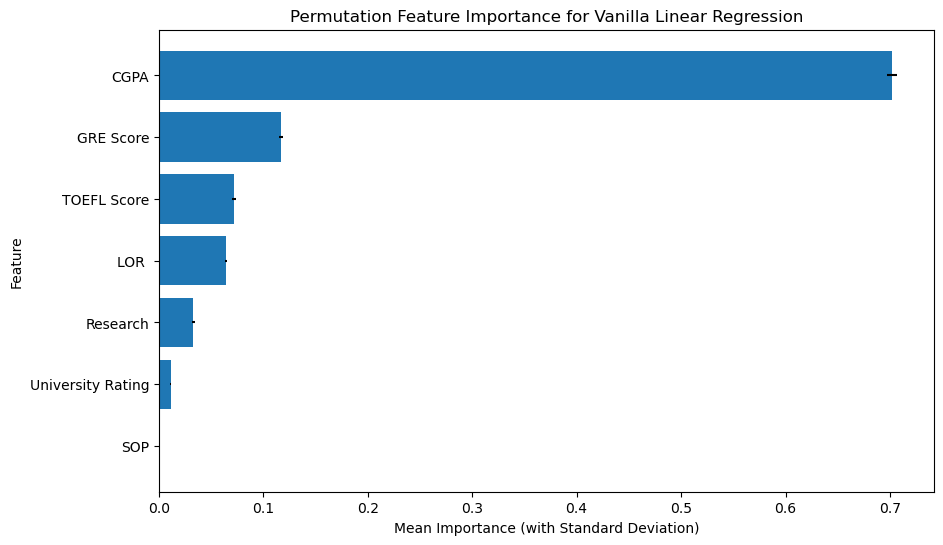

In [112]:
result = permutation_importance(linear_regression, test[features], test[target], n_repeats=100, random_state=42, scoring='neg_mean_absolute_error')

# Extract feature importances and sort them
importances = result.importances_mean

importances = importances / np.sum(importances)

std = result.importances_std
features = test[features].columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], xerr=std[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Mean Importance (with Standard Deviation)")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance for Vanilla Linear Regression")
plt.gca().invert_yaxis()
plt.show()

# Saving the polynomial regression pipeline

In [113]:
import pickle

# Save the pipeline to a file
with open('poly_regression_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [114]:
# Load the pipeline from the file
with open('poly_regression_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [115]:
# making predictions
evaluate_regression_model(test[target], loaded_pipeline.predict(test[features]))

,Metric,Value
0,R² Score,0.827844
1,Mean Squared Error (MSE),0.004064
2,Mean Absolute Error (MAE),0.044439
3,Root Mean Squared Error (RMSE),0.063749


In [116]:
# taking a simple sample
a_single_sample = test.iloc[[44]][features]
a_single_sample

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
82,320,110,5,5.0,4.5,9.22,1


In [117]:
print("Predicted chance of admit for this applicant: ", loaded_pipeline.predict(a_single_sample))

Predicted chance of admit for this applicant:  [0.86864457]


In [118]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
a_single_sample = pd.DataFrame([[340, 0, 1, 5, 5, 8, 1]], columns=features)

print("Predicted chance of admit for this applicant: ", loaded_pipeline.predict(a_single_sample))

Predicted chance of admit for this applicant:  [1.04251958]


# Evaluation and Future Work

Polynomial regression model outperforms linear regression model. However, it is also very susceptible to overfitting. We experimented with Linear and Polynomial regression models to model the admission
chances of applicants based on their academic credentials. We also applied different
analytical approaches to understand the relationship between different features. We
applied the Chi-Squared test of independence to understand if there existed a relationship
between the categorical features. In the future, we want to understand the strength of the
relationship by implementing Cramér's V statistic, which will enable us to represent the
strength of the relationship between 0 (no association) to 1 (strong association).
Furthermore, we would like to experiment and evaluate complex tree-based models like
Random Forest and XGBoost, as well as neural network architectures.



# Conclusion

This project has been developed with the main purpose of streamlining and easing the
US graduate application process for international students. It is often very hectic for
international applicants to work on different standardized tests like TOEFL and GRE when
they are from non-English backgrounds. Expensive application fees, which usually range
between $50 to $100, also limit the ability of international applicants to apply to multiple
universities without having a financial burden. Using a dataset containing several
academic parameters like CGPA, GRE and TOEFL scores, Strength of LORs, and SOP,
etc, we applied regression modeling using linear and polynomial regression to predict an
applicant’s chances. By accessing our web application and entering their academic
credentials, international students will be able to understand the realistic chances of their
admission to their interested university. Based on the system results, applicants can
either decide to proceed with their application or reflect on and strengthen their application
before applying. To conclude, we achieved our main goal of providing a powerful and
accurate online ML system that international students can utilize to simplify their US
graduate application process.